In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss, acf, grangercausalitytests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot,quarter_plot
from scipy import signal
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

In [ ]:
df=pd.read_csv('air-radioactivity-2.csv')
df

,Location,Province,Collection Year,Collection Time (s),Air Volume (m3),7Be Activity (mBq/m3),7Be Uncertainty (mBq/m3),7Be MDC (mBq/m3),210Pb Activity (mBq/m3),210Pb Uncertainty (mBq/m3),...,134Cs MDC (mBq/m3),137Cs Activity (mBq/m3),137Cs Uncertainty (mBq/m3),137Cs MDC (mBq/m3),131I Activity (mBq/m3),131I Uncertainty (mBq/m3),131I MDC (mBq/m3),106Ru Activity (mBq/m3),106Ru Uncertainty (mBq/m3),106Ru MDC (mBq/m3)
0,Alert,NU,2009-1-5,605280,1852.00000,2.775336,0.119936,0.183023,0.898299,0.047443,...,0.017734,NaN,NaN,0.014081,NaN,NaN,1.402004,NaN,NaN,NaN
1,Alert,NU,2009-1-12,602040,1838.00000,2.511766,0.112781,0.186647,1.063669,0.053208,...,0.015256,NaN,NaN,0.014959,NaN,NaN,1.572990,NaN,NaN,NaN
2,Alert,NU,2009-1-19,594900,1952.00000,2.623490,0.125648,0.215237,1.289000,0.059705,...,0.014541,NaN,NaN,0.013357,NaN,NaN,7.825901,NaN,NaN,NaN
3,Alert,NU,2009-1-26,606180,2108.00000,1.531583,0.087783,0.182367,0.284711,0.023876,...,0.014751,NaN,NaN,0.012981,NaN,NaN,3.896823,NaN,NaN,NaN
4,Alert,NU,2009-2-2,605220,2030.00000,3.542633,0.137878,0.182481,0.990318,0.049050,...,0.015939,NaN,NaN,0.013104,NaN,NaN,2.436548,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25831,Winnipeg,MB,2022-2-8,608160,12627.79980,2.504462,0.081238,0.054321,0.858447,0.036235,...,0.005647,NaN,NaN,0.004030,NaN,NaN,0.122039,NaN,NaN,NaN
25832,Winnipeg,MB,2022-2-15,600480,12463.29980,2.882208,0.088488,0.044860,0.969526,0.037447,...,0.004136,NaN,NaN,0.003545,NaN,NaN,0.208764,NaN,NaN,NaN
25833,Winnipeg,MB,2022-2-22,605220,12568.00000,2.397653,0.074691,0.038768,1.093408,0.041378,...,0.003922,NaN,NaN,0.003345,NaN,NaN,0.129917,NaN,NaN,NaN
25834,Winnipeg,MB,2022-3-21,1286580,26409.90039,1.948618,0.055365,0.018533,0.309449,0.012905,...,0.001683,NaN,NaN,0.001526,NaN,NaN,0.044475,NaN,NaN,NaN


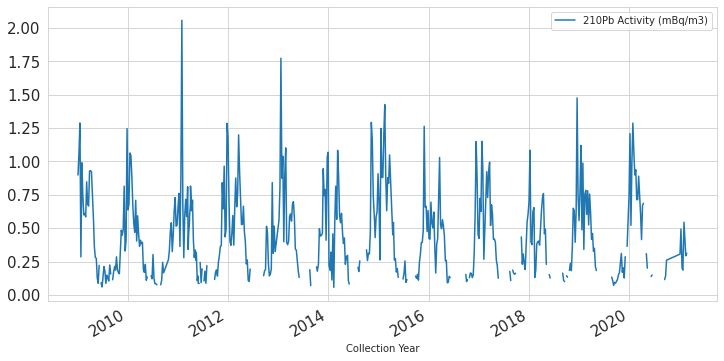

In [ ]:
df['Collection Year'] = pd.to_datetime(df['Collection Year']) # convert date column to DateTime
ax = df[df['Location']=='Alert'].plot(x='Collection Year',kind='line', y='210Pb Activity (mBq/m3)', figsize=(12,6))

In [ ]:
!pip install matplotlib basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.6/860.6 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 57.4 MB/s eta 0:00:00
  Attempting uninstall: pyproj
    Found existing installation: pyproj 3.6.0
    Uninstalling pyproj-3.6.0:
      Successfully uninstalled pyproj-3.6.0


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd

# Sample dataset
# Replace this with your own dataset or import it from a file

data = {
    "latitude": [40.7128, 34.0522, 41.8781, 37.7749],
    "longitude": [-74.0060, -118.2437, -87.6298, -122.4194],
    "value": [100, 200, 150, 300],
}

# Convert the data into a pandas DataFrame
df = pd.DataFrame(data)

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Create a Basemap object centered on the continental United States
map = Basemap(
    projection="merc",
    llcrnrlat=25,  # Lower-left corner latitude
    urcrnrlat=50,  # Upper-right corner latitude
    llcrnrlon=-125,  # Lower-left corner longitude
    urcrnrlon=-65,  # Upper-right corner longitude
    resolution="i",  # c: crude, l: low, i: intermediate, h: high, f: full
)

# Draw coastlines and country boundaries
map.drawcoastlines()
map.drawcountries()

# Convert lat/lon to map coordinates
x, y = map(df["longitude"].values, df["latitude"].values)

# Plot the data points on the map with size proportional to the 'value' column
map.scatter(
    x, y, s=df["value"], c="red", alpha=0.7, edgecolors="k", linewidth=1, zorder=10
)

# Add a colorbar to indicate the value range
plt.colorbar(label="Value")

# Add title and labels
plt.title("Longitudinal and Latitudinal Trends")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.show()